In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
#seaborn settings
sns.set_palette("deep",desat=.6)
sns.set_context(rc={"figure.figsize" :(6,4)})


In [4]:
df = pd.read_csv("SCDB.csv",na_values=["N/A","Unknown"],
encoding='ISO-8859-1')
def parse_csv(df):
    data = []
    n=0
    with open(df,'rb') as sd:
        r = csv.DictReader(sd)
        for line in r:
            data.append(line)
        return data

In [5]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [ ]:
#All the columns in the data set
df.columns

In [ ]:
df.info()

In [ ]:
df.justiceName

In [6]:
# Reads all of the data into dictionaries.  It will assume
# that the first row is the header row. These are 
# the names we want to use as fields. Dict Reader will create
# a dictionary for each row. Also quoted fields also get
# taken care of. 

import os
import csv

def parse_csv(df):
    data = []
    n=0
    with open(df,'rb') as sd:
        r = csv.DictReader(sd)
        for line in r:
            data.append(line)
        return data

In [7]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


(array([ 42833.,  10253.,   5263.,   2739.,   4580.,  22880.,  23977.,
           978.,   3528.,    621.]),
 array([  10010.,   23016.,   36022.,   49028.,   62034.,   75040.,
          88046.,  101052.,  114058.,  127064.,  140070.]),
 <a list of 10 Patch objects>)

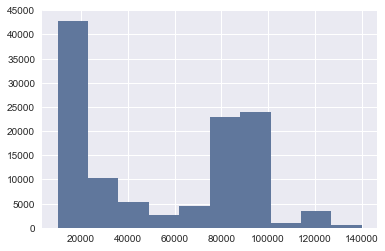

In [11]:
plt.hist(df.issue.dropna())

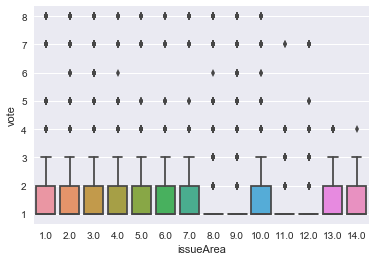

In [37]:
sns.boxplot(df.issueArea.dropna(), df.vote.dropna())

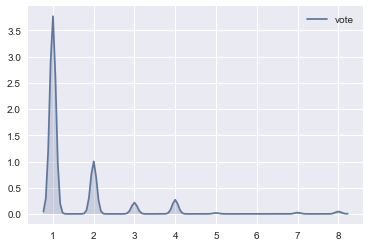

In [22]:
sns.kdeplot(df.vote.dropna(), shade=True)

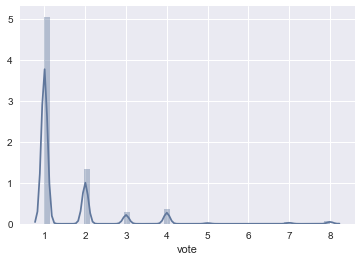

In [28]:
sns.distplot(df.vote.dropna())

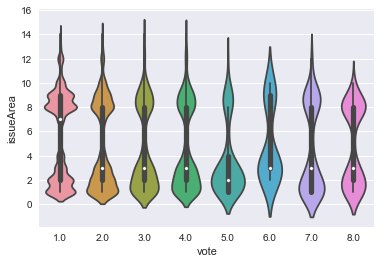

In [35]:
sns.violinplot(df.vote.dropna(), df.issueArea.dropna())

In [ ]:
cj=df[(df.justiceName=='EKagan') | (df.justiceName=='AScalia')| 
(df.justiceName=='SSotomayor') | (df.justiceName=='SAlito')|
(df.justiceName=='SBreyer') | (df.justiceName=='RGinsburg')|
(df.justiceName=='CThomas') | (df.justiceName=='JRoberts') |
(df.justiceName=='AKennedy')]

In [ ]:
cj.head()

In [31]:
small=df[["dateDecision","justiceName","vote","issueArea","issue"]]

In [ ]:
small.head()

In [32]:
small_all=small.groupby(["justiceName","issue","vote"]).count()

In [33]:
small_all.head()

dateDecision  issueArea
justiceName issue   vote                         
AFortas     10010.0 1.0             10         10
            10020.0 1.0              6          6
                    3.0              1          1
            10030.0 1.0              1          1
            10040.0 1.0             11         11

In [ ]:
plt.hist(small_all.['justiceName'])

In [ ]:
#Clean the data
#count the number of missing elemnts in each column

counter_nan=small_all.isnull().sum()
counter_without_nan=counter_nan[counter_nan==0]

In [ ]:
#remove the columns with missing elements
small_all=small_all[counter_without_nan.keys()]

In [ ]:
#Create feature vectors
x=small_all.iloc[:,:-1].values
standard_scalar=StandardScaler()
x_std=standard_scalar.fit_transform(x)

In [ ]:
#t distributed stochastic neighbor embedding (t_SNE)
#visualization
tsne=TSNE(n_components=2, random_state=0)
x_test_2d= tsne.fit_transform(x_std)

In [ ]:
#scatter plot the sample points
markers=('s','d','o','^','v')
color_map= {0:'red', 1:'blue', 2:'lightgreen', 3:'purple',
           4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(x_test_2d)):
    plt.scatter(x=x_test_2d[idx][0], y=x_test_2d[idx][1],
               c=color_map[idx],marker=markers[idx],
               label=cl)
plt.show()

In [ ]:
cl

In [ ]:
x_test_2d[0]